---

##**Anomaly Detection using KMeans and KNN**

---


In [2]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.1 MB/s eta 0:00:00


In [4]:
# python outlier detection
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=af4ba14b9ca860c2a488297e6923c5bc98aa13b7dc10bf6afd5a44a1e3641d3d
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from faker import Faker
from sklearn.cluster import KMeans
from pyod.models.knn import KNN

In [6]:
# 1. Generate Synthetic Data using Faker
# Creating a Faker object to generate fake names
fake = Faker()
Faker.seed(4321)  # Setting seed for reproducibility

In [7]:
# Generating 100 random fake names
names_list = [fake.name() for _ in range(100)]
print(names_list)

['Jason Brown', 'Jacob Stein', 'Cody Brown', 'Larry Morales', 'Jessica Hendricks', 'Brian Moore', 'Scott Baker', 'Ruth Hoffman', 'Daniel George', 'David Moody', 'Brian Maxwell', 'Cory Cooper', 'Morgan Foster', 'James Sandoval', 'Brian Lester', 'Anne Davis', 'Miss Amanda Harris MD', 'Amy Dunn', 'Brian Lee', 'Kimberly Pratt', 'Russell Yang', 'Renee Fisher', 'Rebecca Castro', 'Robert Yoder', 'Todd Young', 'John Houston', 'Matthew Valdez', 'Gary Nguyen', 'Alexander Poole', 'Dean Welch', 'Andrew Perez', 'Brian Porter', 'Aaron Walker', 'Lisa Wilson', 'Brian Miller', 'Nicholas Evans', 'Jessica Hernandez', 'Teresa Haynes', 'Angela Maynard', 'Stephanie Gregory', 'Phyllis Hess', 'Stephen Martin', 'Emily Blair', 'Hannah Holland', 'Adam Hoffman', 'Holly Roberts', 'Jeffrey Brown', 'Sarah Keith', 'Sean Weeks', 'Tony Lloyd', 'Caleb Davidson', 'Andrew Patterson', 'Joshua Ellis', 'Cassandra Lewis', 'Sabrina Wallace', 'Derek Allison', 'Taylor Dawson', 'Allison Yoder', 'Jo Brown', 'Jennifer Mcdowell', 'M

In [8]:
# Generating 100 random salary values between 1000 and 2500
np.random.seed(7)
salaries = [np.random.randint(1000, 2500) for _ in range(100)]
print(salaries)

[1175, 2220, 1537, 1502, 1211, 1919, 2372, 2209, 2422, 1535, 1345, 1366, 1554, 1730, 1904, 2191, 2092, 2456, 1391, 1940, 2099, 1823, 1250, 2030, 2468, 2068, 2349, 2176, 1183, 1949, 2136, 1763, 2213, 1290, 1312, 1201, 2486, 1550, 1772, 1494, 2161, 2219, 2096, 1944, 1257, 1400, 2398, 2373, 1940, 1604, 1764, 1279, 1745, 1803, 2472, 2341, 2415, 2175, 1092, 1759, 2248, 1356, 1931, 1481, 1579, 2243, 1481, 2043, 1923, 1787, 1033, 2147, 2310, 1741, 1989, 2439, 2154, 2107, 1402, 1021, 1203, 1047, 1784, 1524, 1349, 1107, 1393, 1844, 1622, 1654, 1636, 1276, 1309, 1827, 1035, 1260, 1456, 2498, 2007, 2239]


In [9]:
# Creating a DataFrame with the generated names and salaries
df = pd.DataFrame({'person': names_list, 'salary': salaries})
print(df.head())

              person  salary
0        Jason Brown    1175
1        Jacob Stein    2220
2         Cody Brown    1537
3      Larry Morales    1502
4  Jessica Hendricks    1211


In [10]:
# 2. Introduce Anomalies
# Changing the salary values for 16th and 65th records to introduce outliers
df.at[16, 'salary'] = 23
df.at[65, 'salary'] = 17
print(f"Anomalous entry at index 16: \n{df.loc[16]}")
print(f"Anomalous entry at index 65: \n{df.loc[65]}")

Anomalous entry at index 16: 
person    Miss Amanda Harris MD
salary                       23
Name: 16, dtype: object
Anomalous entry at index 65: 
person    Joyce Bishop
salary              17
Name: 65, dtype: object


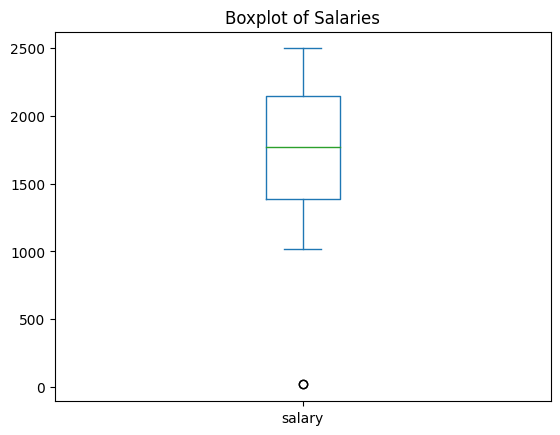

In [11]:
# 3. Visualize Salary Distribution
# Boxplot visualization for salary
df['salary'].plot(kind='box', title='Boxplot of Salaries')
plt.show()

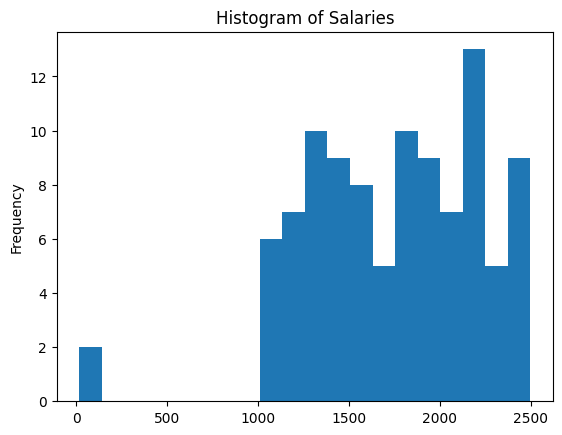

In [12]:
# Histogram visualization for salary
df['salary'].plot(kind='hist', title='Histogram of Salaries', bins=20)
plt.show()

In [13]:
# 4. Anomaly Detection using KMeans
# Reshaping and converting salary values to float64 for faster computation
raw_salary = df['salary'].values.reshape(-1, 1).astype('float64')

In [14]:
# Apply KMeans clustering (using 4 clusters)
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(raw_salary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

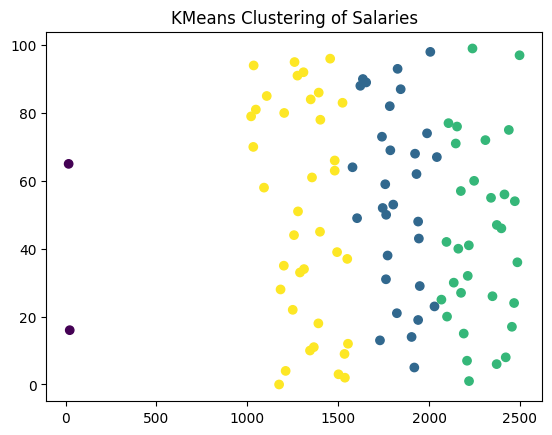

In [15]:
# Visualize the clustering labels
kmeans_labels = kmeans_model.labels_
plt.scatter(raw_salary, np.arange(0, 100), c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering of Salaries')
plt.show()

In [16]:
# 5. Supervised Anomaly Detection using KNN (pyOD)
# Introduce labels for supervised learning (class 1 for anomalies)
df['class'] = 0
df.at[16, 'class'] = 1
df.at[65, 'class'] = 1
print(f"Label for index 16: {df.at[16, 'class']}")

Label for index 16: 1


In [17]:
# Prepare data for KNN
X = df['salary'].values.reshape(-1, 1)
y = df['class'].values

In [18]:
# Apply KNN model for anomaly detection (contamination level of 2%)
knn_model = KNN(contamination=0.02, n_neighbors=5)
knn_model.fit(X)

KNN(algorithm='auto', contamination=0.02, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [19]:
# Decision scores for training data
y_train_scores = knn_model.decision_scores_
print("KNN Decision Scores:", y_train_scores)

KNN Decision Scores: [  68.   28.   35.   33.   39.   21.   43.   30.   46.   33.   36.   27.
   30.   34.   36.   28. 1024.   34.   35.   17.   48.   39.   39.   66.
   30.   39.   49.   29.   67.   26.   37.   21.   26.   30.   36.   49.
   47.   29.   15.   38.   25.   28.   51.   21.   33.   44.   41.   42.
   17.   50.   20.   29.   19.   31.   33.   57.   42.   28.   71.   18.
   39.   37.   13.   43.   43. 1030.   43.   54.   19.   24.   74.   29.
   63.   23.   49.   33.   22.   40.   46.   86.   47.   60.   21.   30.
   40.   74.   37.   60.   68.   76.   82.   26.   36.   43.   72.   30.
   54.   59.   61.   30.]


In [20]:
# Test the model with new salary data
test_salary_1 = np.array([[35.]])  # Test with a potential anomaly
print("Is 35 an anomaly?", knn_model.predict(test_salary_1))  # Should return 1 (anomaly)

Is 35 an anomaly? [1]


In [21]:
test_salary_2 = np.array([[1005.]])  # Test with a normal salary
print("Is 1005 an anomaly?", knn_model.predict(test_salary_2))  # Should return 0 (not an anomaly)

Is 1005 an anomaly? [0]




---


### **Conclusion:**


---



In this project, we successfully applied two methods for anomaly detection on a synthetic salary dataset. Using KMeans clustering, we identified groups of similar salary values and visually spotted outliers. We then used the KNN algorithm from the `pyOD` library for supervised anomaly detection, labeling known anomalies in the dataset and training the model to detect them. The model was able to predict potential anomalies accurately based on the contamination level.

The combination of KMeans for unsupervised clustering and KNN for supervised anomaly detection demonstrated how different machine learning techniques can be applied to identify irregularities in a dataset, providing insights into the detection of outliers.


---

